# Class 9: pandas Series and Data Frames

Today we will continue our exploration of pandas DataFrames which allow us to analyze data tables.

In [1]:
import YData

# YData.download.download_class_code(9)   # get class code    
# YData.download.download_class_code(9, True)  # get the code with the answers 

YData.download.download_data("dow.csv")
YData.download.download_data("nba_salaries_2022_23.csv")
YData.download_data("nyc23_flights.csv")
YData.download_data("nyc23_airlines.csv")


The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_salaries_2022_23.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_flights.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_airlines.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


There are also similar functions to download the homework:

In [2]:
# YData.download.download_homework(4)  # downloads the fourth homework 

If you are using colabs, you should run the code.

In [3]:
# !pip install https://github.com/lederman/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

## Warm-up exercise 1: tuples and dictionaries

As a warm-up exercise, let's see if you remember how to do the following: 

1. Create a tuple called `my_tuple` that has the values that have 1, 2, 3
2. Create a dictionary called `my_dict`, with:
* key a stores a list with the values 1, 2, 3
* key b stores a list with the values "a", "b", "c"



In [4]:
# Create my_tuple and print it

my_tuple = (1, 2, 3)

my_tuple

(1, 2, 3)

In [5]:
# Create my_dict and print it

my_dict = {"a": [1, 2, 3], "b": ["a", "b", "c"]}

my_dict

{'a': [1, 2, 3], 'b': ['a', 'b', 'c']}

In [6]:
# Side note: we can create pandas DataFrames from dictionaries using the pd.DataFrame(my_dict) function 

import pandas as pd

my_df = pd.DataFrame(my_dict)

print(type(my_df))

my_df


<class 'pandas.core.frame.DataFrame'>


,a,b
0,1,a
1,2,b
2,3,c


## Cool-down exercise 2: basic pandas data manipulation

Let's do a few additional warm-up exercises practicing some basic pandas data manipulation methods.

As an example, let's look at data on the closing price of the [Dow Jones Industrial Average](https://www.marketwatch.com/investing/index/djia) which is an index of the prices of the 30 largest corporations in the US.

The code below loads the DOW data into a Pandas DataFrame and displays the first 5 rows using the `head()` method. 


In [7]:
# Load the dow data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# read in the data
dow = pd.read_csv("dow.csv", parse_dates=[0], date_format="%m/%d/%y", index_col="Date")

dow.head()


,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
1992-01-02,1992,1,Thursday,3152.100098,3172.629883,3139.310059,3172.399902,23550000
1992-01-03,1992,1,Friday,3172.399902,3210.639893,3165.919922,3201.500000,23620000
1992-01-06,1992,1,Monday,3201.500000,3213.330078,3191.860107,3200.100098,27280000
1992-01-07,1992,1,Tuesday,3200.100098,3210.199951,3184.479980,3204.800049,25510000
1992-01-08,1992,1,Wednesday,3204.800049,3229.199951,3185.820068,3203.899902,29040000


#### Step 1

Create a DataFrame called `open_and_close` that has just he close and opening prices. Print out the first 3 rows of this DataFrame.

In [8]:
open_and_close = dow[["Open", "Close"]]

open_and_close.head(3)

,Open,Close
Date,,
1992-01-02,3152.100098,3172.399902
1992-01-03,3172.399902,3201.500000
1992-01-06,3201.500000,3200.100098


#### Step 2

Extract just the first 5 rows of the `open_and_close` into a DataFrame called `first_rows`. 

In [9]:
first_rows = open_and_close.iloc[0:5]

first_rows


,Open,Close
Date,,
1992-01-02,3152.100098,3172.399902
1992-01-03,3172.399902,3201.500000
1992-01-06,3201.500000,3200.100098
1992-01-07,3200.100098,3204.800049
1992-01-08,3204.800049,3203.899902


#### Step 3

Extract just the row of the `open_and_close` from August 16th 2023 into a Series called `one_day`. 


In [10]:
one_day = open_and_close.loc["2023-08-16"]

one_day


Open     34914.960938
Close    34765.738281
Name: 2023-08-16, dtype: float64

#### Step 4

Calculate how many points the DOW changed on the day that is stored in the DataFrame `one_day` (i.e., the difference between opening and closing price). 


In [11]:
print(one_day["Close"] - one_day["Open"])

one_day.Close - one_day.Open   # alternatively 

-149.22265625


np.float64(-149.22265625)

#### Step 5

Now create a DataFrame that has just the data from 2023 by using Boolean masking on the `Year` column. 

Save the results to the name `dow_2023` and print out how many days of data are in the `dow_2023` DataFrame.


In [12]:
# Get the data from just 2023 using Boolean masking

boolean_mask_2023 = dow["Year"] == 2003
dow_2023 = dow.loc[boolean_mask_2023]

dow_2023.shape[0]


252

#### Step 6

Sort the `dow_2023` by the highest closing value and print out the first 5 rows of this sorted DataFrame.


In [13]:
dow_2023.sort_values("Close", ascending = True).head(5)

,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
2003-03-11,2003,3,Tuesday,7568.529785,7642.410156,7520.629883,7524.060059,227470000
2003-03-12,2003,3,Wednesday,7517.759766,7552.069824,7416.640137,7552.069824,286350000
2003-03-10,2003,3,Monday,7739.399902,7739.470215,7559.640137,7568.180176,215960000
2003-03-06,2003,3,Thursday,7774.759766,7777.419922,7659.089844,7673.990234,231760000
2003-03-04,2003,3,Tuesday,7838.140137,7845.709961,7704.310059,7704.870117,219770000


#### Step 7

Plot the closing price of the DOW for 2023 as a time series.

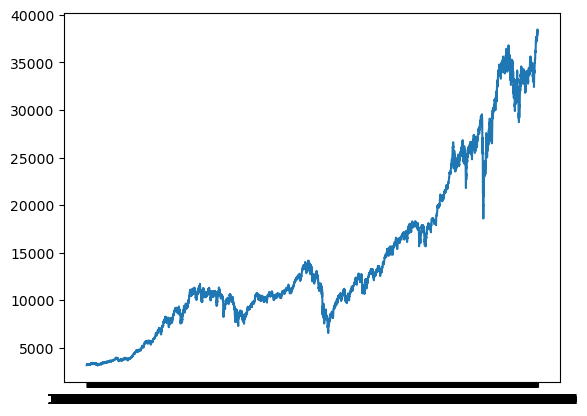

In [14]:
plt.plot(dow.Close);